In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Loading

In [ ]:
dat = pd.read_csv('/content/drive/MyDrive/testData1.csv')
X = pd.DataFrame(dat, columns=['A', 'B']).to_numpy()
Y = pd.DataFrame(dat, columns=['Y']).to_numpy()
A = pd.DataFrame(dat, columns=['A']).to_numpy()
B = pd.DataFrame(dat, columns=['B']).to_numpy()

In [ ]:
dat

,A,B,Y
0,0.50,-1.25,0
1,-1.75,-1.00,1
2,-0.75,-1.00,1
3,3.00,-1.00,0
4,1.00,-0.50,0
5,0.00,0.00,0
6,3.00,0.00,0
7,-2.00,0.25,1
8,-1.00,1.00,1
9,1.00,1.00,1


## Data Visualisation

In [ ]:
n = Y.shape[0]
cat = Y.reshape((n,))
cat.shape 

(14,)

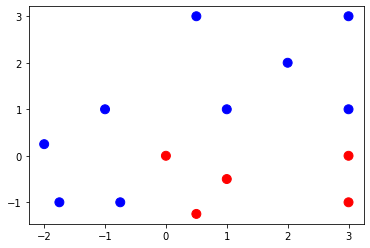

In [ ]:
colors = np.array([ 'r' , 'b' ])
plt.scatter(A, B, s=80 ,c=colors[cat])
plt.savefig('DataPlot.png')
plt.show()

# **First Layer**

## *First Neuron*

### Choosing a random pattern

In [ ]:
### Choosing a random pattern
n = X.shape[0]
r = np.random.randint(0,n)
r = 7
r

7

In [ ]:
### Creating mask
mask = (Y != Y[r])
mask

array([[ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

### Finding nearest Border Pattern

In [ ]:
### Distance matrix
dist = np.zeros((n,n))
for i in range(n):
    temp = np.sum(np.square(X - X[i,:]), axis=1)
    dist[i,:] = np.transpose(temp)

dist

array([[ 0.    ,  5.125 ,  1.625 ,  6.3125,  0.8125,  1.8125,  7.8125,
         8.5   ,  7.3125,  5.3125, 11.3125, 12.8125, 18.0625, 24.3125],
       [ 5.125 ,  0.    ,  1.    , 22.5625,  7.8125,  4.0625, 23.5625,
         1.625 ,  4.5625, 11.5625, 26.5625, 23.0625, 21.0625, 38.5625],
       [ 1.625 ,  1.    ,  0.    , 14.0625,  3.3125,  1.5625, 15.0625,
         3.125 ,  4.0625,  7.0625, 18.0625, 16.5625, 17.5625, 30.0625],
       [ 6.3125, 22.5625, 14.0625,  0.    ,  4.25  , 10.    ,  1.    ,
        26.5625, 20.    ,  8.    ,  4.    , 10.    , 22.25  , 16.    ],
       [ 0.8125,  7.8125,  3.3125,  4.25  ,  0.    ,  1.25  ,  4.25  ,
         9.5625,  6.25  ,  2.25  ,  6.25  ,  7.25  , 12.5   , 16.25  ],
       [ 1.8125,  4.0625,  1.5625, 10.    ,  1.25  ,  0.    ,  9.    ,
         4.0625,  2.    ,  2.    , 10.    ,  8.    ,  9.25  , 18.    ],
       [ 7.8125, 23.5625, 15.0625,  1.    ,  4.25  ,  9.    ,  0.    ,
        25.0625, 17.    ,  5.    ,  1.    ,  5.    , 15.25  ,  9.    ],

In [ ]:
### Finding different class patterns closest to chosen pattern
row = dist[r,:]*np.transpose(mask) [0]
d = np.min(row[np.nonzero(row)])
d

4.0625

In [ ]:
row

array([ 8.5   ,  0.    ,  0.    , 26.5625,  9.5625,  4.0625, 25.0625,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ])

In [ ]:
### Nearest border pattern
s = np.where( row == d)
p = s[0][0]
p

5

In [ ]:
X[r]  

array([-2.  ,  0.25])

In [ ]:
X[p]

array([0., 0.])

### Draw the circle

In [ ]:
### Extract indices of points lying in the circle
def draw_circle(r,p,dist):
  row = dist[r,:]
  arr = np.where(row <= dist[r,p])
  return arr[0]

pts_arr = draw_circle(r,p,dist)
pts_arr

array([1, 2, 5, 7, 8])

In [ ]:
### Reduced distance matrix
temp = dist[pts_arr,:]
dist_circle = temp[:,pts_arr]
dist_circle

array([[0.    , 1.    , 4.0625, 1.625 , 4.5625],
       [1.    , 0.    , 1.5625, 3.125 , 4.0625],
       [4.0625, 1.5625, 0.    , 4.0625, 2.    ],
       [1.625 , 3.125 , 4.0625, 0.    , 1.5625],
       [4.5625, 4.0625, 2.    , 1.5625, 0.    ]])

In [ ]:
### Reduced Y_matrix
Y_circle = Y[pts_arr]
Y_circle

array([[1],
       [1],
       [0],
       [1],
       [1]])

In [ ]:
### Reduced X_matrix
X_circle = X[pts_arr]
X_circle

array([[-1.75, -1.  ],
       [-0.75, -1.  ],
       [ 0.  ,  0.  ],
       [-2.  ,  0.25],
       [-1.  ,  1.  ]])

### Find Border Pairs inside the circle

In [ ]:
### Find out all border pair points
def border_pair(dist, X, Y):
  bord_indx = []
  midpts = []
  bord_pairs = []
  it = np.nditer(dist, flags=['multi_index'])
  for d in it:
    i,j = it.multi_index
    if i != j and i < j and Y[i] != Y[j]:
        mask_row = np.transpose(Y != Y[i])
        mask_column = (Y != Y[j])
        row = dist[i,:] * mask_row
        column = dist[:,j] * mask_column
        if d == np.min(row[np.nonzero(row)]) and dist[i,j] == np.min(column[np.nonzero(column)]):
          print(" {} and {} are border pairs".format(i,j) )
          temp = [i,j]
          temp_mid = (X[i,:] + X[j,:])/2        
          bord_indx.append(temp)
          midpts.append(temp_mid)
  bord_pairs = [bord_indx, midpts]
  print(bord_pairs)
  return bord_pairs

In [ ]:
### Searching Border Pairs inside the circle 
bord_pairs = border_pair(dist_circle, X_circle, Y_circle)

 1 and 2 are border pairs
[[[1, 2]], [array([-0.375, -0.5  ])]]


In [ ]:
X_circle[1]

array([-0.75, -1.  ])

In [ ]:
X_circle[2]

array([0., 0.])

### Draw Border Line in the circle

In [ ]:
### Forming triplet for drawing Border Line
def triple_pt(bord_pairs, X_circle):
  bord_indx, midpts = bord_pairs[0], bord_pairs[1]
  l = np.shape(bord_indx)[0] 
  v = np.random.randint(l)
  a, b = bord_indx[v][0],bord_indx[v][1]
  xm = midpts[v]
  arr = np.sum(np.square(X_circle - xm), axis=1)
  arr[a] = 0
  arr[b] = 0
  r = np.min(arr[np.nonzero(arr)])
  s = np.where(arr == r)
  x0 = X_circle[s[0][0]]
  x1 = X_circle[a]
  x2 = X_circle[b]
  print(arr)
  print(s)
  return s, x0, x1, x2


s, x0, x1, x2 = triple_pt(bord_pairs, X_circle)

[2.140625 0.       0.       3.203125 2.640625]
(array([0]),)


In [ ]:
x0 = np.array([-1.0, 1.0])
x0

array([-1.,  1.])

In [ ]:
x1

array([-0.75, -1.  ])

In [ ]:
x2

array([0., 0.])

In [ ]:
### Draw the border line that maximises the margin 
def margin_weights2D(s, x0, x1, x2, Y_circle, bord_pairs):
  bord_indx,_ = bord_pairs
  x1i = Y_circle[bord_indx[0][0]]
  x2i = Y_circle[bord_indx[0][1]]
  x0i = Y_circle[s[0][0]]
  arr = np.stack((x1, x0, x2), axis=-1)
  arr = np.vstack((arr, [1,1,1]))
  weights = np.matmul(np.array([x1i[0], x0i[0], x2i[0]]), np.linalg.pinv(arr)) # pinv for singular matrices
  return weights

weights = margin_weights2D(s, x0, x1, x2, Y_circle, bord_pairs)
weights

array([-1.14285714e+00, -1.42857143e-01,  1.50486674e-16])

### Visualise the straight line

In [ ]:
a,b,c = weights
c

1.5048667416626956e-16

In [ ]:
n = Y.shape[0]
cat = Y.reshape((n,))
cat.shape 

(14,)

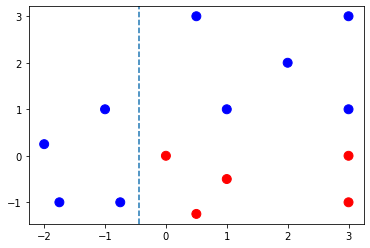

In [ ]:
colors = np.array([ 'r' , 'b' ])
axes = plt.gca()
plt.scatter(A, B, s=80 ,c=colors[cat])

if round(b) != 0:
  x_vals = np.array(axes.get_xlim())
  intercept = (-c+0.5)/b
  slope = - a/b
  y_vals = intercept + slope * x_vals
  plt.plot(x_vals, y_vals, '--')
else :
  plt.axvline(x = (0.5 - c)/a, linestyle='--')


plt.savefig('DataPlot.png')
plt.show()

### Exclude Homogeneous areas

In [ ]:
m = X.shape[0]
id = np.ones(m).reshape((m,1))
X_ex = np.hstack((X, id))
temp = np.matmul(X_ex, np.transpose(weights))
## Positive section
p_ind = np.where(temp >= 0.5)

## Negative section
n_ind = np.where(temp < 0.5)

## Checking for homogeneous areas on any side
if np.all(Y[p_ind] == 1):
  X_del = X[n_ind]
  Y_del = Y[n_ind]

if np.all(Y[n_ind] == 0):
  X_del = X[p_ind]
  Y_del = Y[p_ind]

X_del ## after excluding homogeneous area

array([[ 0.5 , -1.25],
       [ 3.  , -1.  ],
       [ 1.  , -0.5 ],
       [ 0.  ,  0.  ],
       [ 3.  ,  0.  ],
       [ 1.  ,  1.  ],
       [ 3.  ,  1.  ],
       [ 2.  ,  2.  ],
       [ 0.5 ,  3.  ],
       [ 3.  ,  3.  ]])

In [ ]:
## Additional cross-check till next section
np.matmul(X_ex[p_ind], np.transpose(weights))

array([2.14285714, 1.        , 2.25      , 1.        ])

In [ ]:
Y[p_ind]

array([[1],
       [1],
       [1],
       [1]])

In [ ]:
np.matmul(X_ex[n_ind], np.transpose(weights))

array([-3.92857143e-01, -3.28571429e+00, -1.07142857e+00,  1.50486674e-16,
       -3.42857143e+00, -1.28571429e+00, -3.57142857e+00, -2.57142857e+00,
       -1.00000000e+00, -3.85714286e+00])

In [ ]:
Y[n_ind]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1]])

### Visualise the input for second neuron

In [ ]:
n = Y_del.shape[0]
cat = Y_del.reshape((n,))
cat.shape 

(10,)

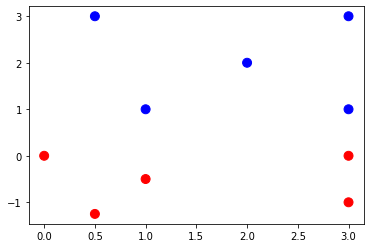

In [ ]:
colors = np.array([ 'r' , 'b' ])
A = X_del[:,0]
B = X_del[:,1]
plt.scatter(A, B, s=80 ,c=colors[cat])
plt.savefig('DataPlot.png')
plt.show()

## *Second Neuron*

### Choosing a random pattern

In [ ]:
### Choosing a random pattern
n = X_del.shape[0]
r = np.random.randint(0,n)
r = 5
r

5

In [ ]:
### Creating mask
mask = (Y_del != Y_del[r])
mask

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False]])

### Finding nearest Border Pattern

In [ ]:
### Distance matrix
dist_del = np.zeros((n,n))
for i in range(n):
    temp = np.sum(np.square(X_del - X_del[i,:]), axis=1)
    dist_del[i,:] = np.transpose(temp)

dist_del

array([[ 0.    ,  6.3125,  0.8125,  1.8125,  7.8125,  5.3125, 11.3125,
        12.8125, 18.0625, 24.3125],
       [ 6.3125,  0.    ,  4.25  , 10.    ,  1.    ,  8.    ,  4.    ,
        10.    , 22.25  , 16.    ],
       [ 0.8125,  4.25  ,  0.    ,  1.25  ,  4.25  ,  2.25  ,  6.25  ,
         7.25  , 12.5   , 16.25  ],
       [ 1.8125, 10.    ,  1.25  ,  0.    ,  9.    ,  2.    , 10.    ,
         8.    ,  9.25  , 18.    ],
       [ 7.8125,  1.    ,  4.25  ,  9.    ,  0.    ,  5.    ,  1.    ,
         5.    , 15.25  ,  9.    ],
       [ 5.3125,  8.    ,  2.25  ,  2.    ,  5.    ,  0.    ,  4.    ,
         2.    ,  4.25  ,  8.    ],
       [11.3125,  4.    ,  6.25  , 10.    ,  1.    ,  4.    ,  0.    ,
         2.    , 10.25  ,  4.    ],
       [12.8125, 10.    ,  7.25  ,  8.    ,  5.    ,  2.    ,  2.    ,
         0.    ,  3.25  ,  2.    ],
       [18.0625, 22.25  , 12.5   ,  9.25  , 15.25  ,  4.25  , 10.25  ,
         3.25  ,  0.    ,  6.25  ],
       [24.3125, 16.    , 16.25  , 18

In [ ]:
### Finding different class patterns closest to chosen pattern
row = dist_del[r,:]*np.transpose(mask) [0]
d = np.min(row[np.nonzero(row)])
d

2.0

In [ ]:
### Nearest border pattern
s = np.where( row == d)
p = s[0][0]
p

3

In [ ]:
X_del[p]

array([0., 0.])

In [ ]:
X_del[r]

array([1., 1.])

### Draw the circle

In [ ]:
pts_arr = draw_circle(r,p,dist_del)
pts_arr

array([3, 5, 7])

In [ ]:
### Reduced distance matrix
temp = dist_del[pts_arr,:]
dist_circle = temp[:,pts_arr]
dist_circle

array([[0., 2., 8.],
       [2., 0., 2.],
       [8., 2., 0.]])

In [ ]:
### Reduced Y_matrix
Y_circle = Y_del[pts_arr]
Y_circle

array([[0],
       [1],
       [1]])

In [ ]:
### Reduced X_matrix
X_circle = X_del[pts_arr]
X_circle

array([[0., 0.],
       [1., 1.],
       [2., 2.]])

### Find Border Pairs inside the circle

In [ ]:
### Searching Border Pairs inside the circle 
bord_pairs = border_pair(dist_circle, X_circle, Y_circle)

 0 and 1 are border pairs
[[[0, 1]], [array([0.5, 0.5])]]


In [ ]:
X_circle[0]

array([0., 0.])

In [ ]:
X_circle[1]

array([1., 1.])

### Draw Border Line in the circle

In [ ]:
### Forming triplet for drawing Border Line
s, x0, x1, x2 = triple_pt(bord_pairs, X_circle)

[0.  0.  4.5]
(array([2]),)


In [ ]:
x0 = np.array([3.0, 1.0])
x0

array([3., 1.])

In [ ]:
x1  

array([0., 0.])

In [ ]:
x2

array([1., 1.])

In [ ]:
### Draw the border line that maximises the margin 
weights = margin_weights2D(s, x0, x1, x2,Y_circle, bord_pairs)
weights

array([-2.22044605e-16,  1.00000000e+00,  5.08782649e-17])

### Visualise the straight line

In [ ]:
a,b,c = weights
c

5.087826489915717e-17

In [ ]:
n = Y_del.shape[0]
cat = Y_del.reshape((n,))
cat.shape 

(10,)

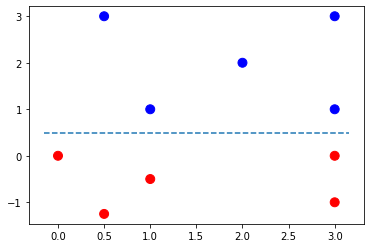

In [ ]:
colors = np.array([ 'r' , 'b' ])
axes = plt.gca()
A = X_del[:,0]
B = X_del[:,1]
plt.scatter(A, B, s=80 ,c=colors[cat])

if round(b) != 0:
  x_vals = np.array(axes.get_xlim())
  intercept = (-c+0.5)/b
  slope = - a/b
  y_vals = intercept + slope * x_vals
  plt.plot(x_vals, y_vals, '--')
else :
  plt.axvline(x = (0.5 - c)/a, linestyle='--')


plt.savefig('DataPlot.png')
plt.show()

### Exclude Homogeneous areas

In [ ]:
m = X_del.shape[0]
id = np.ones(m).reshape((m,1))
X_ex = np.hstack((X_del, id))
temp = np.matmul(X_ex, np.transpose(weights))
## Positive section
p_ind = np.where(temp >= 0.5)

## Negative section
n_ind = np.where(temp < 0.5)

## Checking for homogeneous areas on any side
if np.all(Y_del[p_ind] == 1):
  X_del2 = X_del[n_ind]
  Y_del2 = Y_del[n_ind]

if np.all(Y_del[n_ind] == 0):
  X_del2 = X_del[p_ind]
  Y_del2 = Y_del[p_ind]

X_del2 ## after excluding homogeneous area

array([[1. , 1. ],
       [3. , 1. ],
       [2. , 2. ],
       [0.5, 3. ],
       [3. , 3. ]])

In [ ]:
## Additional cross-check till next section
np.matmul(X_ex[p_ind], np.transpose(weights))

array([1., 1., 2., 3., 3.])

In [ ]:
Y_del[p_ind]

array([[1],
       [1],
       [1],
       [1],
       [1]])

In [ ]:
np.matmul(X_ex[n_ind], np.transpose(weights))

array([-1.25000000e+00, -1.00000000e+00, -5.00000000e-01,  5.08782649e-17,
       -6.15255550e-16])

In [ ]:
Y_del[n_ind]

array([[0],
       [0],
       [0],
       [0],
       [0]])

### Visualise the input for third neuron

In [ ]:
n = Y_del2.shape[0]
cat = Y_del2.reshape((n,))
cat.shape 

(5,)

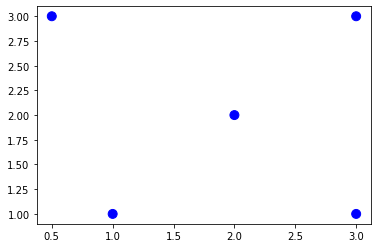

In [ ]:
colors = np.array([ 'r' , 'b' ])
A = X_del2[:,0]
B = X_del2[:,1]
plt.scatter(A, B, s=80 ,c=colors[cat])
plt.savefig('DataPlot.png')
plt.show()

## *Third Neuron*

### Choosing a random pattern

In [ ]:
### Choosing a random pattern
n = X_del2.shape[0]
r = np.random.randint(0,n)
# r = 1
r

2

In [ ]:
X_del2[r]

array([3., 1.])

In [ ]:
### Creating mask
mask = (Y_del2 != Y_del2[r])
mask

array([[ True],
       [False],
       [False],
       [False],
       [False],
       [False]])

### Finding nearest Border Pattern

In [ ]:
### Distance matrix
dist_del2 = np.zeros((n,n))
for i in range(n):
    temp = np.sum(np.square(X_del2 - X_del2[i,:]), axis=1)
    dist_del2[i,:] = np.transpose(temp)

dist_del2

array([[ 0.  ,  5.  ,  1.  ,  5.  , 15.25,  9.  ],
       [ 5.  ,  0.  ,  4.  ,  2.  ,  4.25,  8.  ],
       [ 1.  ,  4.  ,  0.  ,  2.  , 10.25,  4.  ],
       [ 5.  ,  2.  ,  2.  ,  0.  ,  3.25,  2.  ],
       [15.25,  4.25, 10.25,  3.25,  0.  ,  6.25],
       [ 9.  ,  8.  ,  4.  ,  2.  ,  6.25,  0.  ]])

In [ ]:
### Finding different class patterns closest to chosen pattern
row = dist_del2[r,:]*np.transpose(mask) [0]
d = np.min(row[np.nonzero(row)])
d

1.0

In [ ]:
### Nearest border pattern
s = np.where( row == d)
p = s[0][0]
p

0

In [ ]:
X_del2[p]

array([3., 0.])

### Draw the circle

In [ ]:
pts_arr = draw_circle(r,p,dist_del2)
pts_arr

array([0, 2])

In [ ]:
### Reduced distance matrix
temp = dist_del2[pts_arr,:]
dist_circle = temp[:,pts_arr]
dist_circle

array([[0., 1.],
       [1., 0.]])

In [ ]:
### Reduced Y_matrix
Y_circle = Y_del2[pts_arr]
Y_circle

array([[0],
       [1]])

In [ ]:
### Reduced X_matrix
X_circle = X_del2[pts_arr]
X_circle

array([[3., 0.],
       [3., 1.]])

### Find Border Pairs inside the circle

In [ ]:
### Searching Border Pairs inside the circle 
bord_pairs = border_pair(dist_circle, X_circle, Y_circle)

 0 and 1 are border pairs
[[[0, 1]], [array([3. , 0.5])]]


### Draw Border Line in the circle

In [ ]:
### Forming triplet for drawing Border Line
s, x0, x1, x2 = triple_pt(bord_pairs, X_del2)

[ 0.    0.    0.25  3.25 12.5   6.25]
(array([2]),)


In [ ]:
x0

array([3., 1.])

In [ ]:
x1 

array([3., 0.])

In [ ]:
x2

array([1., 1.])

In [ ]:
### Draw the border line that maximises the margin 
weights = margin_weights2D(s, x0, x1, x2,Y_del2, bord_pairs)
weights

array([-5.55111512e-17,  1.00000000e+00,  0.00000000e+00])

### Visualise the straight line

In [ ]:
a,b,c = weights
b

0.9999999999999999

In [ ]:
n = Y_del2.shape[0]
cat = Y_del2.reshape((n,))
cat.shape 

(6,)

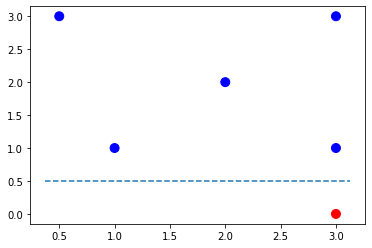

In [ ]:
colors = np.array([ 'r' , 'b' ])
axes = plt.gca()
A = X_del2[:,0]
B = X_del2[:,1]
plt.scatter(A, B, s=80 ,c=colors[cat])

if round(b) != 0:
  x_vals = np.array(axes.get_xlim())
  intercept = (-c+0.5)/b
  slope = - a/b
  y_vals = intercept + slope * x_vals
  plt.plot(x_vals, y_vals, '--')
else :
  plt.axvline(x = (0.5 - c)/a, linestyle='--')


plt.savefig('DataPlot.png')
plt.show()

### Exclude Homogeneous areas

In [ ]:
m = X_del2.shape[0]
id = np.ones(m).reshape((m,1))
X_ex = np.hstack((X_del2, id))
temp = np.matmul(X_ex, np.transpose(weights))
## Positive section
p_ind = np.where(temp >= 0.5)

## Negative section
n_ind = np.where(temp < 0.5)

## Checking for homogeneous areas on any side
if np.all(Y_del2[p_ind] == 1):
  X_del3 = X_del2[n_ind]
  Y_del3 = Y_del2[n_ind]

if np.all(Y_del2[n_ind] == 0):
  X_del3 = X_del2[p_ind]
  Y_del3 = Y_del2[p_ind]

X_del3 ## after excluding homogeneous area

array([[-1,  1],
       [-2,  1],
       [-1,  2],
       [-2,  2]])

In [ ]:
## Additional cross-check till next section
np.matmul(X_ex[p_ind], np.transpose(weights))

array([1. , 1.5, 1. , 1.5])

In [ ]:
Y_del[p_ind]

array([[1],
       [1],
       [1],
       [1]])

In [ ]:
np.matmul(X_ex[n_ind], np.transpose(weights))

array([ 0. , -0.5, -1. , -1.5,  0. , -0.5, -1. , -1.5])

In [ ]:
Y_del[n_ind]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0]])

### Visualise the output for third neuron




In [ ]:
n = Y_del3.shape[0]
cat = Y_del3.reshape((n,))
cat.shape 

(4,)

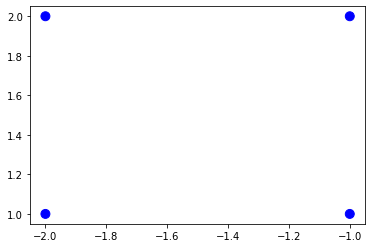

In [ ]:
colors = np.array([ 'r' , 'b' ])
A = X_del3[:,0]
B = X_del3[:,1]
plt.scatter(A, B, s=80 ,c=colors[cat])
plt.savefig('DataPlot.png')
plt.show()